import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pattern 1: Reads files from a given folder, no need to change path because the name is changed. Also Reads xlsb ( Binary Files)

Dump the file in any folder. In this case it is desktop and the folder name is myfolder

Function: It reads the excel or xlsb sheet from the folder and put in the dataframe df. 

## Cautions
1. Only one file should be there in your folder. 
2. File should excel file, extension xlsx


In [1]:
# To change, 4, 5, 15, 18: header, 
import os
# Get the list of all files and folders
pathparent = r"C:\\<your_path\desktop"
folder_source = "myfolder"
path = os.path.join(pathparent,folder_source)

dir_list=os.listdir(path)

source_file = dir_list[0]

file_name,file_extension = os.path.splitext(source_file)
fullpath = os.path.join(path,source_file)

cols=['A','B']

if file_extension == 'xlsb':
    df=pd.read_excel(fullpath,sheet_name='Purchase_sheet',header=5,engine='pyxlsb',usecols=cols,na_values['#DIV/0!','#NAME?','#NUM!','#REF!','#VALUE!'])

if file_extension == 'xlsx':
    df=pd.read_excel(fullpath,sheet_name='Purchase_sheet',header=5,usecols=cols,na_values['#DIV/0!','#NAME?','#NUM!','#REF!','#VALUE!'])
print(fullpath)

SyntaxError: positional argument follows keyword argument (1003607122.py, line 18)

## Pattern  2: You have two sheets. You want to know if the values in first sheet are taken  from the values in second sheet. For example, we have a data validation sheet called validation in excel. And we have a main sheet df, where these values are taken from dropdown from validation. You want to know if this is the case

### Creating Dataset

In [23]:
'''
To test this chunk of code, we need two dataframes: df (the main sheet) 
and validation (the validation sheet). The code is mapping columns from 
df to those in validation using the dictionary dic1. It then checks if 
all the values in each column of df are present in the corresponding 
column of validation and prints the result. If any values are not present, 
it also prints those specific values.
we create two dataframes. 
'''
import pandas as pd

# Sample data for dataframe 'df'
df_data = {
    'Crft Code': ['A1', 'A2', 'A3', 'A4'],
    'Brand': ['Nike', 'Adidas', 'Puma', 'Reebok'],
    'Fiber': ['Cotton', 'Polyester', 'Silk', 'Wool'],
    'Colour': ['Red', 'Green', 'Blue', 'Yellow'],
    'Wash Care Instruction': ['Hand Wash', 'Machine Wash', 'Dry Clean', 'Machine Wash'],
    'Vendor': ['Vendor1', 'Vendor2', 'Vendor3', 'Vendor4'],
    'Vendor Code': ['V01', 'V02', 'V03', 'V04'],
    'Type': ['T1', 'T2', 'T3', 'T4']
}

df = pd.DataFrame(df_data)

# Sample data for dataframe 'validation'
# Intentionally not including some values from 'df' to test the code.
validation_data = {
    'CODE': ['A1', 'A2', 'A5', 'A6'],
    'BRAND': ['Nike', 'Adidas', 'Reebok', 'Under Armour'],
    'Fiber': ['Cotton', 'Polyester', 'Silk', 'Nylon'],
    'Colour': ['Red', 'Green', 'Purple', 'Orange'],
    'Wash Care Instruction': ['Hand Wash', 'Machine Wash', 'Machine Wash', 'Dry Clean'],
    'Company Name': ['Vendor1', 'Vendor2', 'Vendor5', 'Vendor6'],
    'Vendor Code': ['V01', 'V02', 'V05', 'V06'],
    'Type': ['T1', 'T2', 'T5', 'T6']
}

validation = pd.DataFrame(validation_data)

df, validation



(  Crft Code   Brand      Fiber  Colour Wash Care Instruction   Vendor  \
 0        A1    Nike     Cotton     Red             Hand Wash  Vendor1   
 1        A2  Adidas  Polyester   Green          Machine Wash  Vendor2   
 2        A3    Puma       Silk    Blue             Dry Clean  Vendor3   
 3        A4  Reebok       Wool  Yellow          Machine Wash  Vendor4   
 
   Vendor Code Type  
 0         V01   T1  
 1         V02   T2  
 2         V03   T3  
 3         V04   T4  ,
   CODE         BRAND      Fiber  Colour Wash Care Instruction Company Name  \
 0   A1          Nike     Cotton     Red             Hand Wash      Vendor1   
 1   A2        Adidas  Polyester   Green          Machine Wash      Vendor2   
 2   A5        Reebok       Silk  Purple          Machine Wash      Vendor5   
 3   A6  Under Armour      Nylon  Orange             Dry Clean      Vendor6   
 
   Vendor Code Type  
 0         V01   T1  
 1         V02   T2  
 2         V05   T5  
 3         V06   T6  )

### Testing Dataset

In [24]:
# Mapping dictionary as provided in the code snippet
dic1 = {
    'Crft Code':'CODE',
    'Brand':'BRAND',
    'Fiber':'Fiber',
    'Colour':'Colour',
    'Wash Care Instruction':'Wash Care Instruction',
    'Vendor':'Company Name',
    'Vendor Code':'Vendor Code',
    'Type':'Type'
}

# Capturing the print outputs
output = []

# Running the provided code
for a in dic1:
    output.append((a, all(df[a].isin(validation[dic1[a]]))))

output.append("==============================")
output.append("Values which are False")
output.append("==============================")

for b in dic1:
    if all(df[b].isin(validation[dic1[b]])) == False:
        mismatched_values = df[b][~df[b].isin(validation[dic1[b]])].tolist()
        output.append(('Column:', b, mismatched_values))

output


[('Crft Code', False),
 ('Brand', False),
 ('Fiber', False),
 ('Colour', False),
 ('Wash Care Instruction', True),
 ('Vendor', False),
 ('Vendor Code', False),
 ('Type', False),
 '==============================',
 'Values which are False',
 '==============================',
 ('Column:', 'Crft Code', ['A3', 'A4']),
 ('Column:', 'Brand', ['Puma']),
 ('Column:', 'Fiber', ['Wool']),
 ('Column:', 'Colour', ['Blue', 'Yellow']),
 ('Column:', 'Vendor', ['Vendor3', 'Vendor4']),
 ('Column:', 'Vendor Code', ['V03', 'V04']),
 ('Column:', 'Type', ['T3', 'T4'])]

## Pattern 3: Here we can use the expected Regex pattern in columns to the actual values and point out if the pattern is not as per expected

### Testing of the Code

In [25]:
import pandas as pd

# Recreating the sample DataFrame with some inconsistent data
sample_data = {
    'Craft Code': ['ABC', 'DEF', 'GHIJ', 'XYZ'],
    'Vendor Style Code': ['123AB001', '234CD002', '345EF003', '456GH0045'],
    'Style Code/CLUSTER': ['ABC123AB001', 'DEF234CD002', 'GHI345GH004', 'JKL456IJ005'],
    'Colour': ['BLUE', 'RED9', 'GREEN', 'YELLOW'],
    'HSN code': ['51234567', '52345678', '5345678', '54567890'],
    'Brick': ['Saree', 'Dupatta', 'Tunic', 'Saree'],
    'Sub Category': ['Silk', 'Cotton2', 'Linen', 'Wool'],
    'Brand': ['PALHA', 'RIMAYA', 'ANUKTA1', 'PAHUNI'],
    'Fiber': ['Polyester', 'Cotton', 'Linen3', 'Silk'],
    'Fabric': ['Georgette', 'Chiffon4', 'Crepe', 'Satin']
}

df_mock = pd.DataFrame(sample_data)

# Dictionary of column names and their regex patterns
regex_patterns = {
    'Craft Code': r'^[A-Z]{3}$',
    'Vendor Style Code': r'^[1-9][0-9]{2}[A-Z]{2}[0-9]{3}$',
    'Style Code/CLUSTER': r'^[A-Z]{3}[1-9][0-9]{2}[A-Z]{2}[0-9]{2}[1-9]$',
    'Colour': r'^[A-Z]+$',
    'HSN code': r'^5[0-9]{7}$',
    'Brick': r'^(Saree|Dupatta)$',
    'Sub Category': r'^[a-zA-Z]+$',
    'Brand': r'^(PALHA|PAHUNI|RIMAYA|ANUKTA)$',
    'Fiber': r'^[a-zA-Z]+$',
    'Fabric': r'^[a-zA-Z]+$'
}
# Dictionary to provide layman descriptions for the regex patterns
layman_descriptions = {
    'Craft Code': 'Three Capital letters',
    'Vendor Style Code': '3 digits (not starting with 0), followed by 2 capital letters, followed by 3 digits',
    'Style Code/CLUSTER': 'Three Capital letters, followed by 3 digits (not starting with 0), followed by 2 capital letters, followed by 3 digits (last digit not 0)',
    'Colour': 'All capital letters',
    'HSN code': '8 digits starting with the number 5',
    'Brick': 'Either "Saree" or "Dupatta"',
    'Sub Category': 'Text only',
    'Brand': 'Either "PALHA", "PAHUNI", "RIMAYA", or "ANUKTA"',
    'Fiber': 'Text only',
    'Fabric': 'Text only'
}

# Modify the code to provide layman descriptions for the issues
inconsistent_data_layman = {}

for col, pattern in regex_patterns.items():
    mismatches = df_mock[col][df_mock[col].astype(str).str.match(pattern) == False]
    if not mismatches.empty:
        inconsistent_data_layman[col] = {
            "Data": mismatches,
            "Expected": layman_descriptions[col]
        }

inconsistent_data_layman

{'Craft Code': {'Data': 2    GHIJ
  Name: Craft Code, dtype: object,
  'Expected': 'Three Capital letters'},
 'Vendor Style Code': {'Data': 3    456GH0045
  Name: Vendor Style Code, dtype: object,
  'Expected': '3 digits (not starting with 0), followed by 2 capital letters, followed by 3 digits'},
 'Colour': {'Data': 1    RED9
  Name: Colour, dtype: object,
  'Expected': 'All capital letters'},
 'HSN code': {'Data': 2    5345678
  Name: HSN code, dtype: object,
  'Expected': '8 digits starting with the number 5'},
 'Brick': {'Data': 2    Tunic
  Name: Brick, dtype: object,
  'Expected': 'Either "Saree" or "Dupatta"'},
 'Sub Category': {'Data': 1    Cotton2
  Name: Sub Category, dtype: object,
  'Expected': 'Text only'},
 'Brand': {'Data': 2    ANUKTA1
  Name: Brand, dtype: object,
  'Expected': 'Either "PALHA", "PAHUNI", "RIMAYA", or "ANUKTA"'},
 'Fiber': {'Data': 2    Linen3
  Name: Fiber, dtype: object,
  'Expected': 'Text only'},
 'Fabric': {'Data': 1    Chiffon4
  Name: Fabric, dty

## Pattern 4: Show Box plot
#### Data Description: There is a categorical column 'Brand' and there are five numeric columns, we need to calculate five box plots for the 'brand' in the x axis. Also need to show the datapoints as the yellow dots. We would like that values are formatted as decimals and not in scientific notation

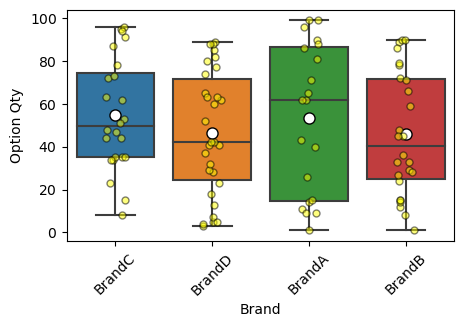

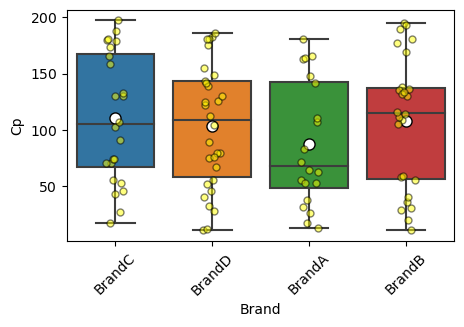

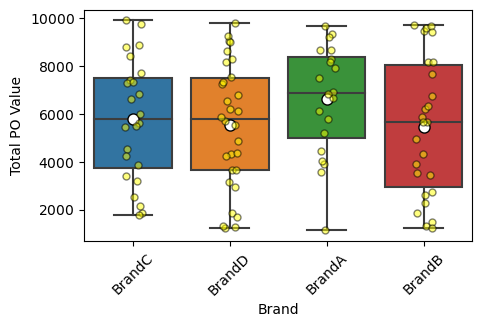

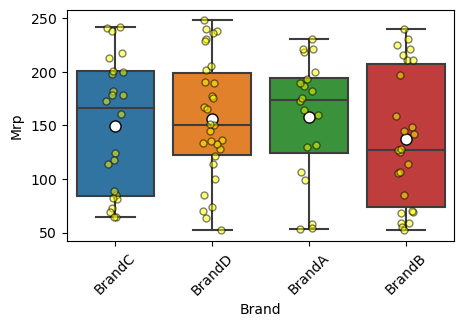

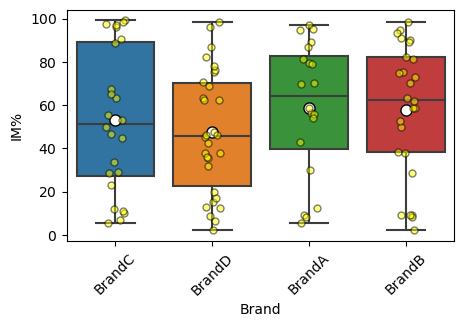

In [26]:
from matplotlib.ticker import ScalarFormatter

# Setting seed for reproducibility
np.random.seed(42)

# Number of data points
n = 100

# Mock data
df = pd.DataFrame({
    'Brand': np.random.choice(['BrandA', 'BrandB', 'BrandC', 'BrandD'], n),
    'Option Qty': np.random.randint(1, 100, n),
    'Cp': np.random.uniform(10, 200, n),
    'Total PO Value': np.random.uniform(1000, 10000, n),
    'Mrp': np.random.uniform(50, 250, n),
    'IM%': np.random.uniform(1, 100, n)
})

a=['Option Qty','Cp','Total PO Value','Mrp','IM%']
for b in a:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Brand',y=b,data=df,showmeans=True,meanprops={'marker':'o',
                                                               'markerfacecolor':'white',
                                                               'markeredgecolor':'black',
                                                               'markersize':'8'})
    sns.stripplot(x='Brand',y=b,data=df,color='yellow',edgecolor='black',linewidth=1,jitter=True,alpha=0.5)
    # Adjust y-axis labels to standard decimal format
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_useOffset(False)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45)
    plt.show()

## Pattern 5: Show Scatter Plot with Simple Linear Regression line with Confidence Band

To create a regression line between two numerical columns A and B, Plot different plots for categorical column C with title as the corresponding values of C. make sure that max 2 columns per line are produced. We would like to show the values or r-squared and p-value

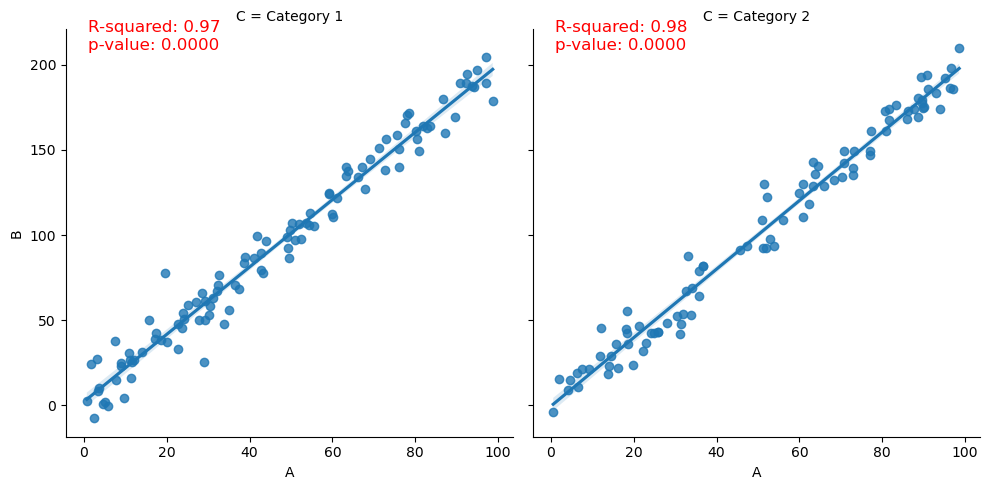

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(42)

# Sample size
n = 200

# Create random data for column A and B
A_values = np.random.rand(n) * 100
B_values = A_values * 2 + np.random.normal(0, 10, n)  # B values have a linear relation with A with some noise

# Create categorical values for column C
C_values = np.random.choice(['Category 1', 'Category 2'], size=n)

# Create the dataframe
df = pd.DataFrame({'A': A_values, 'B': B_values, 'C': C_values})

A='A'
B='B'
C='C'

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Seaborn lmplot
g = sns.lmplot(data=df, x=A, y=B, col=C, col_wrap=2,ci=95)

# Iterate through each subplot to calculate linear regression and annotate
for ax in g.axes.flat:
    C_name = ax.get_title().split('=')[-1].strip()
    C_data = df[df[C] == C_name]
    
    # Calculate linear Regression
    slope, intercept, r_value, p_value, std_err = linregress(C_data[A], C_data[B])
    line = slope * C_data[A] + intercept
    
    # Annotate the plot with R-squared and p-value
    text = f'R-squared: {r_value**2:.2f}\np-value: {p_value:.4f}'
    ax.annotate(text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')

plt.show()


# Pattern 6:  Some Date Patterns

## 6.1 Generate Date Range for Last Week ( Starting from Monday to Sunday)

In [28]:
import pandas as pd
from datetime import timedelta, date

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Check if today is in the current week or the next week
if today.weekday() < 6:  # 0-5 corresponds to Monday to Saturday
    days_since_last_monday = (today.weekday() + 1) % 7  # 1 corresponds to Tuesday (starting day of the week)
    last_monday = today - timedelta(days=days_since_last_monday, weeks=1)
    last_sunday = last_monday + timedelta(days=6)
else:
    # If today is Sunday, adjust to the previous week
    last_monday = today - timedelta(days=6, weeks=1)
    last_sunday = last_monday + timedelta(days=6)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'].dt.date >= last_monday) & (df['date_column'].dt.date <= last_sunday)]

print("Last Monday:", last_monday)
print("Last Sunday:", last_sunday)
print("Filtered DataFrame:")
print(filtered_df)


Last Monday: 2023-10-08
Last Sunday: 2023-10-14
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.2 Generate Date Range for Last Month

In [29]:
import pandas as pd
from datetime import date, timedelta

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current month
first_day_this_month = today.replace(day=1)

# Calculate the last day of the previous month
last_day_last_month = first_day_this_month - timedelta(days=1)

# Calculate the first day of the previous month
first_day_last_month = last_day_last_month.replace(day=1)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'].dt.date >= first_day_last_month) & (df['date_column'].dt.date <= last_day_last_month)]

print("First day of last month:", first_day_last_month)
print("Last day of last month:", last_day_last_month)
print("Filtered DataFrame:")
print(filtered_df)


First day of last month: 2023-09-01
Last day of last month: 2023-09-30
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.3 Generate Date Range for Last Quarter

In [30]:
import pandas as pd
from datetime import date, timedelta

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the last day of the previous quarter
last_quarter_end = pd.Timestamp(today.year, ((today.month - 1) // 3) * 3 + 1, 1) - pd.DateOffset(days=1)

# Calculate the first day of the previous quarter
last_quarter_start = last_quarter_end - pd.DateOffset(months=2)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'] >= last_quarter_start) & (df['date_column'] <= last_quarter_end)]

print("First day of last quarter:", last_quarter_start)
print("Last day of last quarter:", last_quarter_end)
print("Filtered DataFrame:")
print(filtered_df)


First day of last quarter: 2023-07-30 00:00:00
Last day of last quarter: 2023-09-30 00:00:00
Filtered DataFrame:
  date_column
0  2023-08-15
1  2023-08-16
2  2023-08-17
3  2023-08-18
4  2023-08-19
5  2023-08-20
6  2023-08-21


## 6.4 Generate Date Range for Current Week Till today

In [31]:
import pandas as pd
from datetime import date, timedelta, datetime

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current week (Monday)
first_day_of_week = today - timedelta(days=today.weekday())

# Convert date objects to datetime objects for comparison
first_day_of_week_dt = datetime.combine(first_day_of_week, datetime.min.time())
today_dt = datetime.combine(today, datetime.min.time())

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'] >= first_day_of_week_dt) & (df['date_column'] <= today_dt)]

print("First day of current week:", first_day_of_week_dt)
print("Today:", today_dt)
print("Filtered DataFrame:")
print(filtered_df)


First day of current week: 2023-10-16 00:00:00
Today: 2023-10-21 00:00:00
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.5 Generate Date Range for Current Month Till today

In [32]:
import pandas as pd
from datetime import date, timedelta

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current month
first_day_of_month = today.replace(day=1)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'].dt.date >= first_day_of_month) & (df['date_column'].dt.date <= today)]

print("First day of current month:", first_day_of_month)
print("Today:", today)
print("Filtered DataFrame:")
print(filtered_df)


First day of current month: 2023-10-01
Today: 2023-10-21
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.6 Generate Date Range for Current Quarter Till today

In [33]:
import pandas as pd
from datetime import date, timedelta, datetime

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current quarter
first_day_of_quarter = pd.Timestamp(today.year, ((today.month - 1) // 3) * 3 + 1, 1)

# Convert date objects to datetime objects for comparison
first_day_of_quarter_dt = datetime.combine(first_day_of_quarter.date(), datetime.min.time())
today_dt = datetime.combine(today, datetime.min.time())

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'] >= first_day_of_quarter_dt) & (df['date_column'] <= today_dt)]

print("First day of current quarter:", first_day_of_quarter_dt)
print("Today:", today_dt)
print("Filtered DataFrame:")
print(filtered_df)


First day of current quarter: 2023-10-01 00:00:00
Today: 2023-10-21 00:00:00
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.7 Generate Date Range for Current Year Till today

In [34]:
import pandas as pd
from datetime import date, timedelta, datetime

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Convert today's date object to datetime object for comparison
today_dt = datetime.combine(today, datetime.min.time())

# Calculate the first and last day of the last year
first_day_of_year_dt = pd.Timestamp(today.year, 1, 1)

# Filter the DataFrame for the date range of the current year till today
filtered_df_year = df[(df['date_column'] >= first_day_of_year_dt) & (df['date_column'] <= today_dt)]

print("First day of current year:", first_day_of_year_dt)
print("Today:", today_dt)
print("Filtered DataFrame for current year till today:")
print(filtered_df_year)

First day of current year: 2023-01-01 00:00:00
Today: 2023-10-21 00:00:00
Filtered DataFrame for current year till today:
  date_column
0  2023-08-15
1  2023-08-16
2  2023-08-17
3  2023-08-18
4  2023-08-19
5  2023-08-20
6  2023-08-21


### 6.8 Generate Date Range for Last Year


In [35]:
import pandas as pd
from datetime import date, timedelta, datetime
# Re-define today's date
today = date.today()

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])
# Calculate the first and last day of the last year
first_day_of_last_year = pd.Timestamp(today.year - 1, 1, 1)
last_day_of_last_year = pd.Timestamp(today.year - 1, 12, 31)

# Convert date objects to datetime objects for comparison
first_day_of_last_year_dt = datetime.combine(first_day_of_last_year.date(), datetime.min.time())
last_day_of_last_year_dt = datetime.combine(last_day_of_last_year.date(), datetime.min.time())

first_day_of_last_year_dt, last_day_of_last_year_dt
# Filter the DataFrame for the date range of the last year
filtered_df_last_year = df[(df['date_column'] >= first_day_of_last_year_dt) & (df['date_column'] <= last_day_of_last_year_dt)]

filtered_df_last_year

,date_column


# Pattern 7: Daily, Weekly, Monthly, Yearly Sales Graph. 

Suppose I have a daily sales data of a store which has many brands say A, B, C in a column called 'Brand'etc. I want to know the sales pattern of a brand A Daily, Weekly, Monthly Yearly etc. from a start date. I want to show the data values after every n terms. The dates are stored in a column called "Date" & sales data is stored in "Sales".I want to aggregate the sales values by sum. Can plot a line chart or a bar chart. 

You can extend the logic by providing an end date condition in line 39

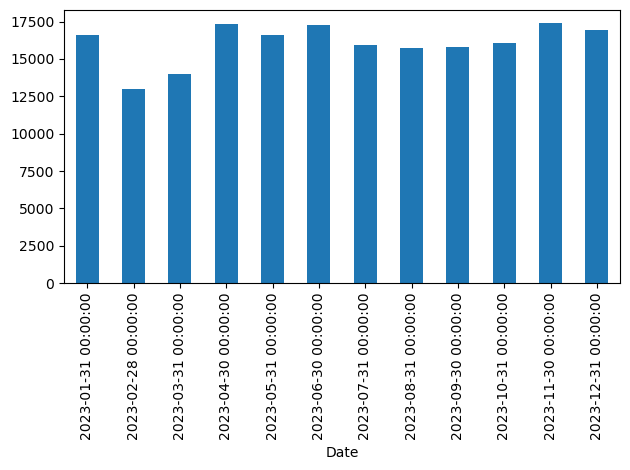

In [36]:
import pandas as pd
import numpy as np

# Generate random sales data for a year
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
sales_data = np.random.randint(100, 1000, size=(len(date_rng), 2))

# Create a dataframe for two brands
df_rimaya = pd.DataFrame({
    'Date': date_rng,
    'Brand': 'A',
    'Sales': sales_data[:, 0]
})

df_other_brand = pd.DataFrame({
    'Date': date_rng,
    'Brand': 'B',
    'Sales': sales_data[:, 1]
})

# Concatenate both dataframes
df = pd.concat([df_rimaya, df_other_brand], ignore_index=True)

# Display the first few rows of the dataset
df.head()
# ==============================================================================
# Main Function
#===============================================================================
import matplotlib.pyplot as plt

# Given variables
agg_variable = 'Sales'
plot = 'bar' #can take bar also
frequency = 'M'  # Can be 'D','W','M',Y'
start_date = '2023-01-01'
brand = 'A'

# Filter the dataframe by given date and brand
df_given_date = df[(df['Date'] >= start_date) & (df['Brand'] == brand)]
grouped = df_given_date.groupby(pd.Grouper(key='Date', freq=frequency))[agg_variable].sum()

# Plot the data
if plot == 'line':
    ax = grouped.plot(kind=plot, marker='o', title=f"{brand}---{agg_variable}--{frequency}")
if plot == 'bar':
    ax = grouped.plot(kind=plot)
    


# Annotate each data point with its value
for x, y in list(zip(grouped.index, grouped.values))[::2]:
    ax.annotate(f'{int(round(y))}', (x, y), textcoords='offset points', xytext=(0, 5), ha='center')

# Show the plot
plt.tight_layout()
plt.show()



# Pattern 7: Compare Frequency Distribution by KDE, ECDF Plots and Histogram

Suppose you have a dataset with a column called 'Brand' containing various brands and a numeric column A eg. MRP, you want to compare the frequency distribution of A by brands

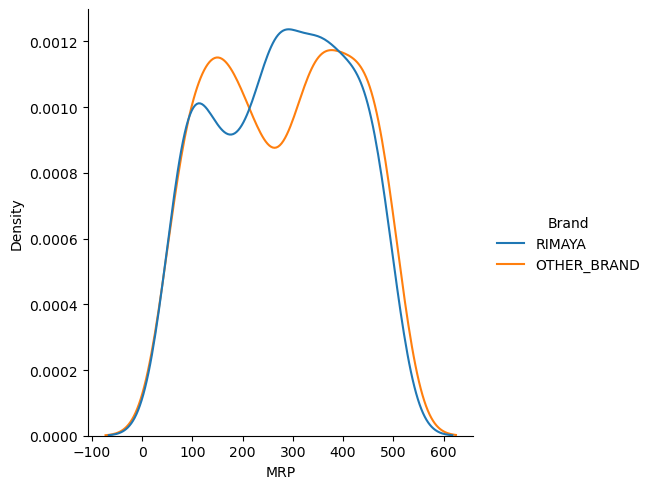

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

# Generate random MRP data
mrp_data = np.random.uniform(50, 500, size=(365,2))

# Create a dataframe for two brands
df_rimaya_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 0],
    'Brand': 'RIMAYA'
})

df_other_brand_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 1],
    'Brand': 'OTHER_BRAND'
})

# Concatenate both dataframes
df = pd.concat([df_rimaya_mrp, df_other_brand_mrp], ignore_index=True)
#=========================================================================
import matplotlib.pyplot as plt
A = 'MRP'
g = sns.displot(data=df,x=A,kind='kde',hue='Brand')
plt.show()

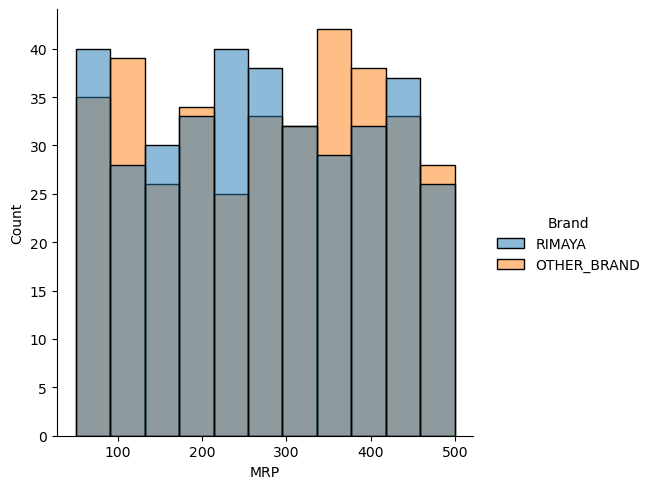

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns

# Generate random MRP data
mrp_data = np.random.uniform(50, 500, size=(365,2))

# Create a dataframe for two brands
df_rimaya_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 0],
    'Brand': 'RIMAYA'
})

df_other_brand_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 1],
    'Brand': 'OTHER_BRAND'
})

# Concatenate both dataframes
df = pd.concat([df_rimaya_mrp, df_other_brand_mrp], ignore_index=True)
#=========================================================================
import matplotlib.pyplot as plt
A = 'MRP'
g = sns.displot(data=df,x=A,kind='hist',hue='Brand')
plt.show()

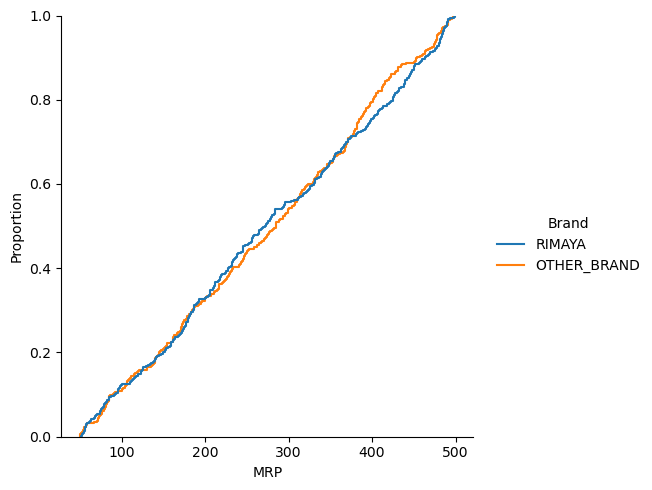

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

# Generate random MRP data
mrp_data = np.random.uniform(50, 500, size=(365,2))

# Create a dataframe for two brands
df_rimaya_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 0],
    'Brand': 'RIMAYA'
})

df_other_brand_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 1],
    'Brand': 'OTHER_BRAND'
})

# Concatenate both dataframes
df = pd.concat([df_rimaya_mrp, df_other_brand_mrp], ignore_index=True)
#=========================================================================
import matplotlib.pyplot as plt
A = 'MRP'
g = sns.displot(data=df,x=A,kind='ecdf',hue='Brand')
plt.show()

# Pattern 8: Create Box Plots of all Numeric Columns in Data Frame

In [40]:
# Loading the sample datset
df=pd.read_csv('sample_dataset_v3.csv')
df.head()

,Billing Date,Brand,Article,Site,Site Area,MRP,Promotion Name,Region,POS Billing Quantity,POS Cost,...,Wash Care Instructions,C Technique,Broad Craft,Handloom Mark,Silk Mark,Type,Style Code,Craft Code,Site Name,Bin
0,2023-03-09,Biba,6517116692,ST40,A,7282,P37,R4,1,3486.742249,...,Handwash Separately,C6,B1,no,no,Printed,6517116,C6,ST40A,7000-7999
1,2023-01-10,Ciba,9792126013,ST35,B,6891,P20,R2,1,3366.377476,...,Handwash Separately,C3,B1,no,no,Embroidered,9792126,C3,ST35B,6000-6999
2,2023-01-30,Aiba,2451609893,ST13,A,1373,P16,R1,1,621.996417,...,Handwash Separately,C8,B1,no,no,Tie-Dyed,2451609,C8,ST13A,1000-1999
3,2023-02-08,Ciba,6919239963,ST24,A,4452,P2,R4,1,2182.635892,...,Handwash Separately,C6,B2,no,no,Embroidered,6919239,C6,ST24A,4000-4999
4,2023-01-01,Ciba,1418488906,ST25,B,5220,P13,R1,1,2421.383859,...,Handwash Separately,C4,B2,no,no,Embroidered,1418488,C4,ST25B,5000-5999


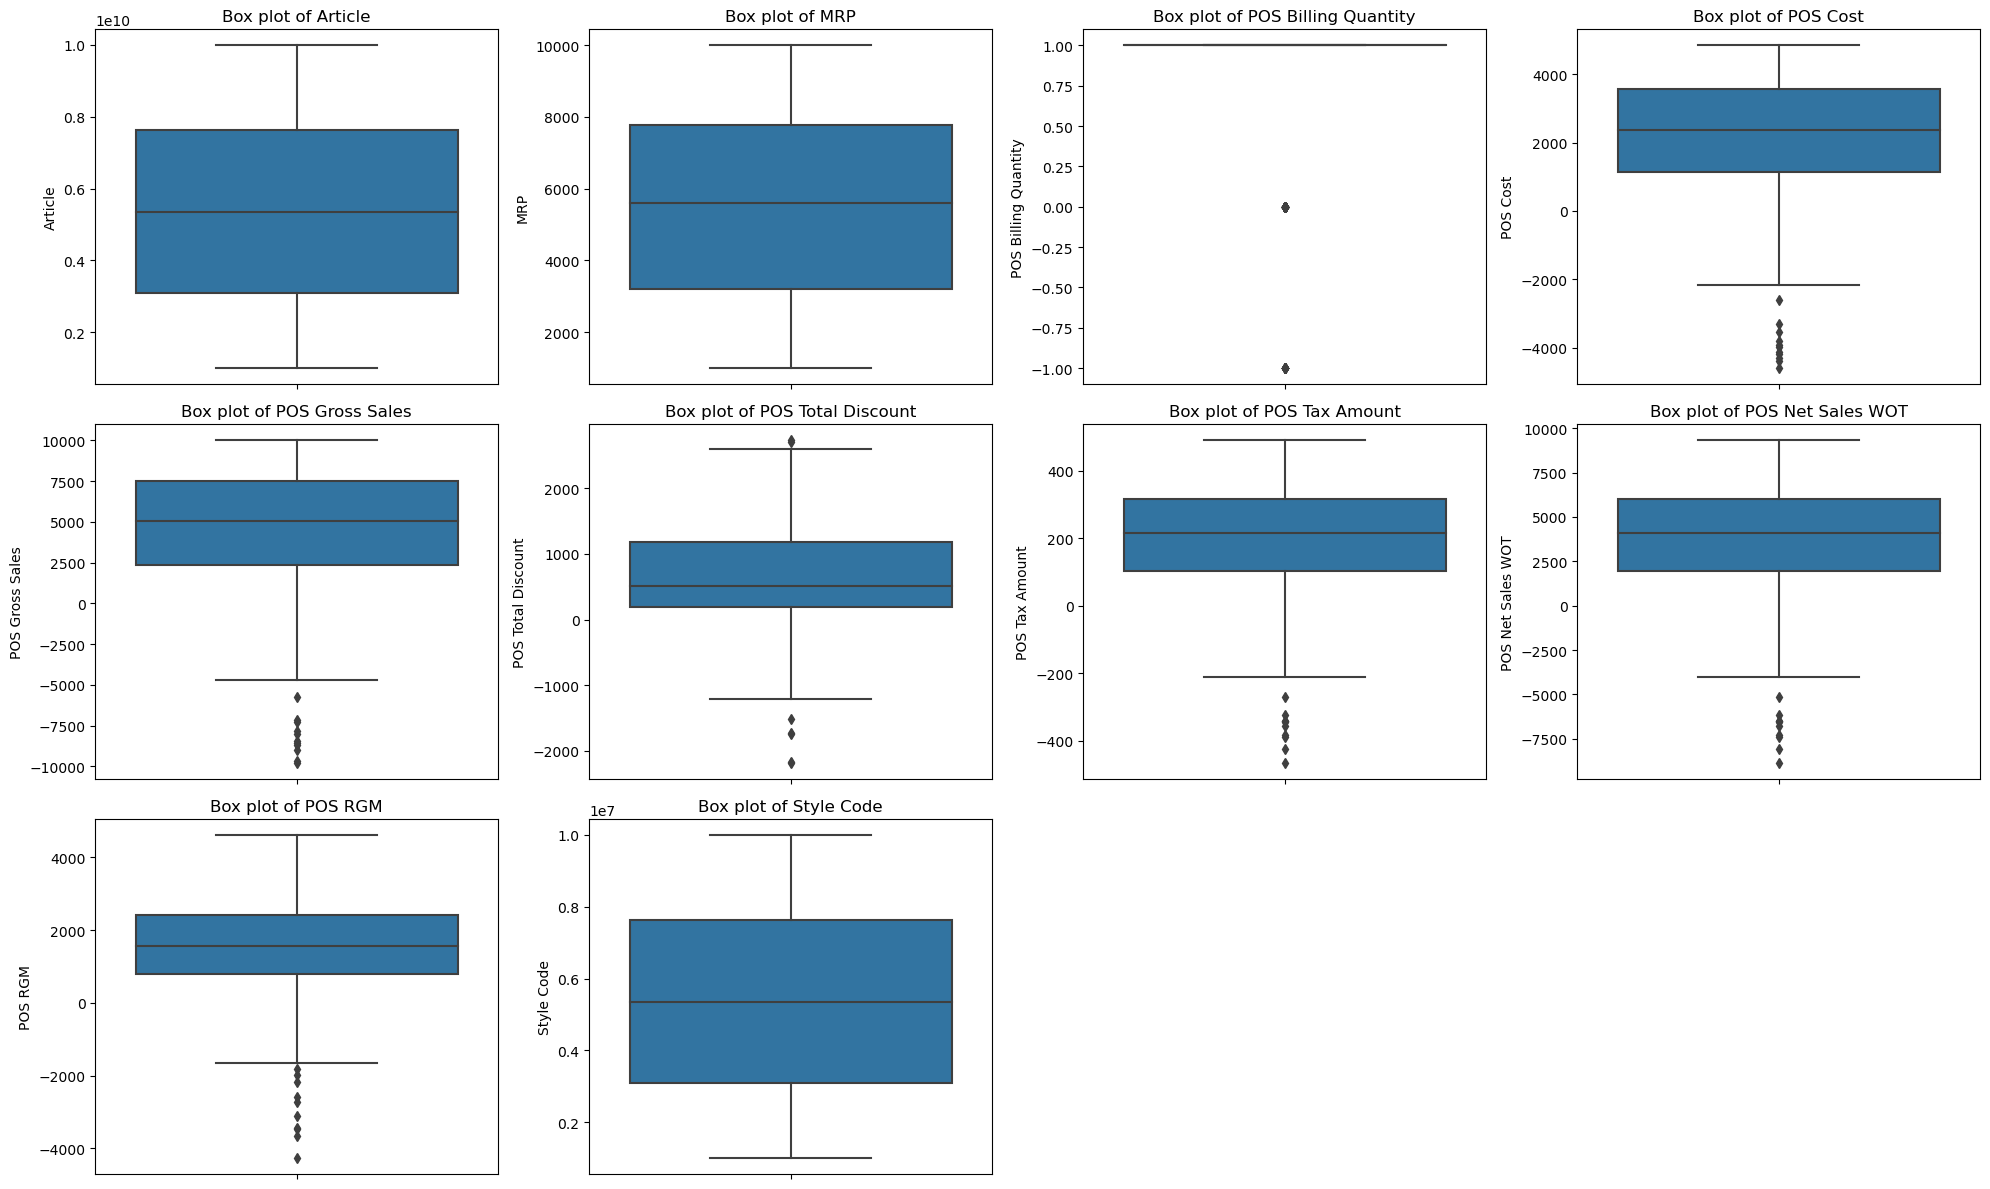

In [41]:
# Determine the number of rows and columns for the subplot grid
num_columns = len(df.select_dtypes(include=['number']).columns)
num_rows = -(-num_columns // 4)  # Ceiling division
num_cols = min(num_columns, 4)  # At most 4 columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 4*num_rows))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through numeric columns and plot box plots on each subplot
for ax, column in zip(axes, df.select_dtypes(include=['number'])):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Box plot of {column}')

# Remove any unused subplots (if applicable)
for ax in axes[num_columns:]:
    ax.remove()

plt.tight_layout()
plt.show()


# Pattern 9: Create Count Plots of all Non Numeric Columns in Data Frame

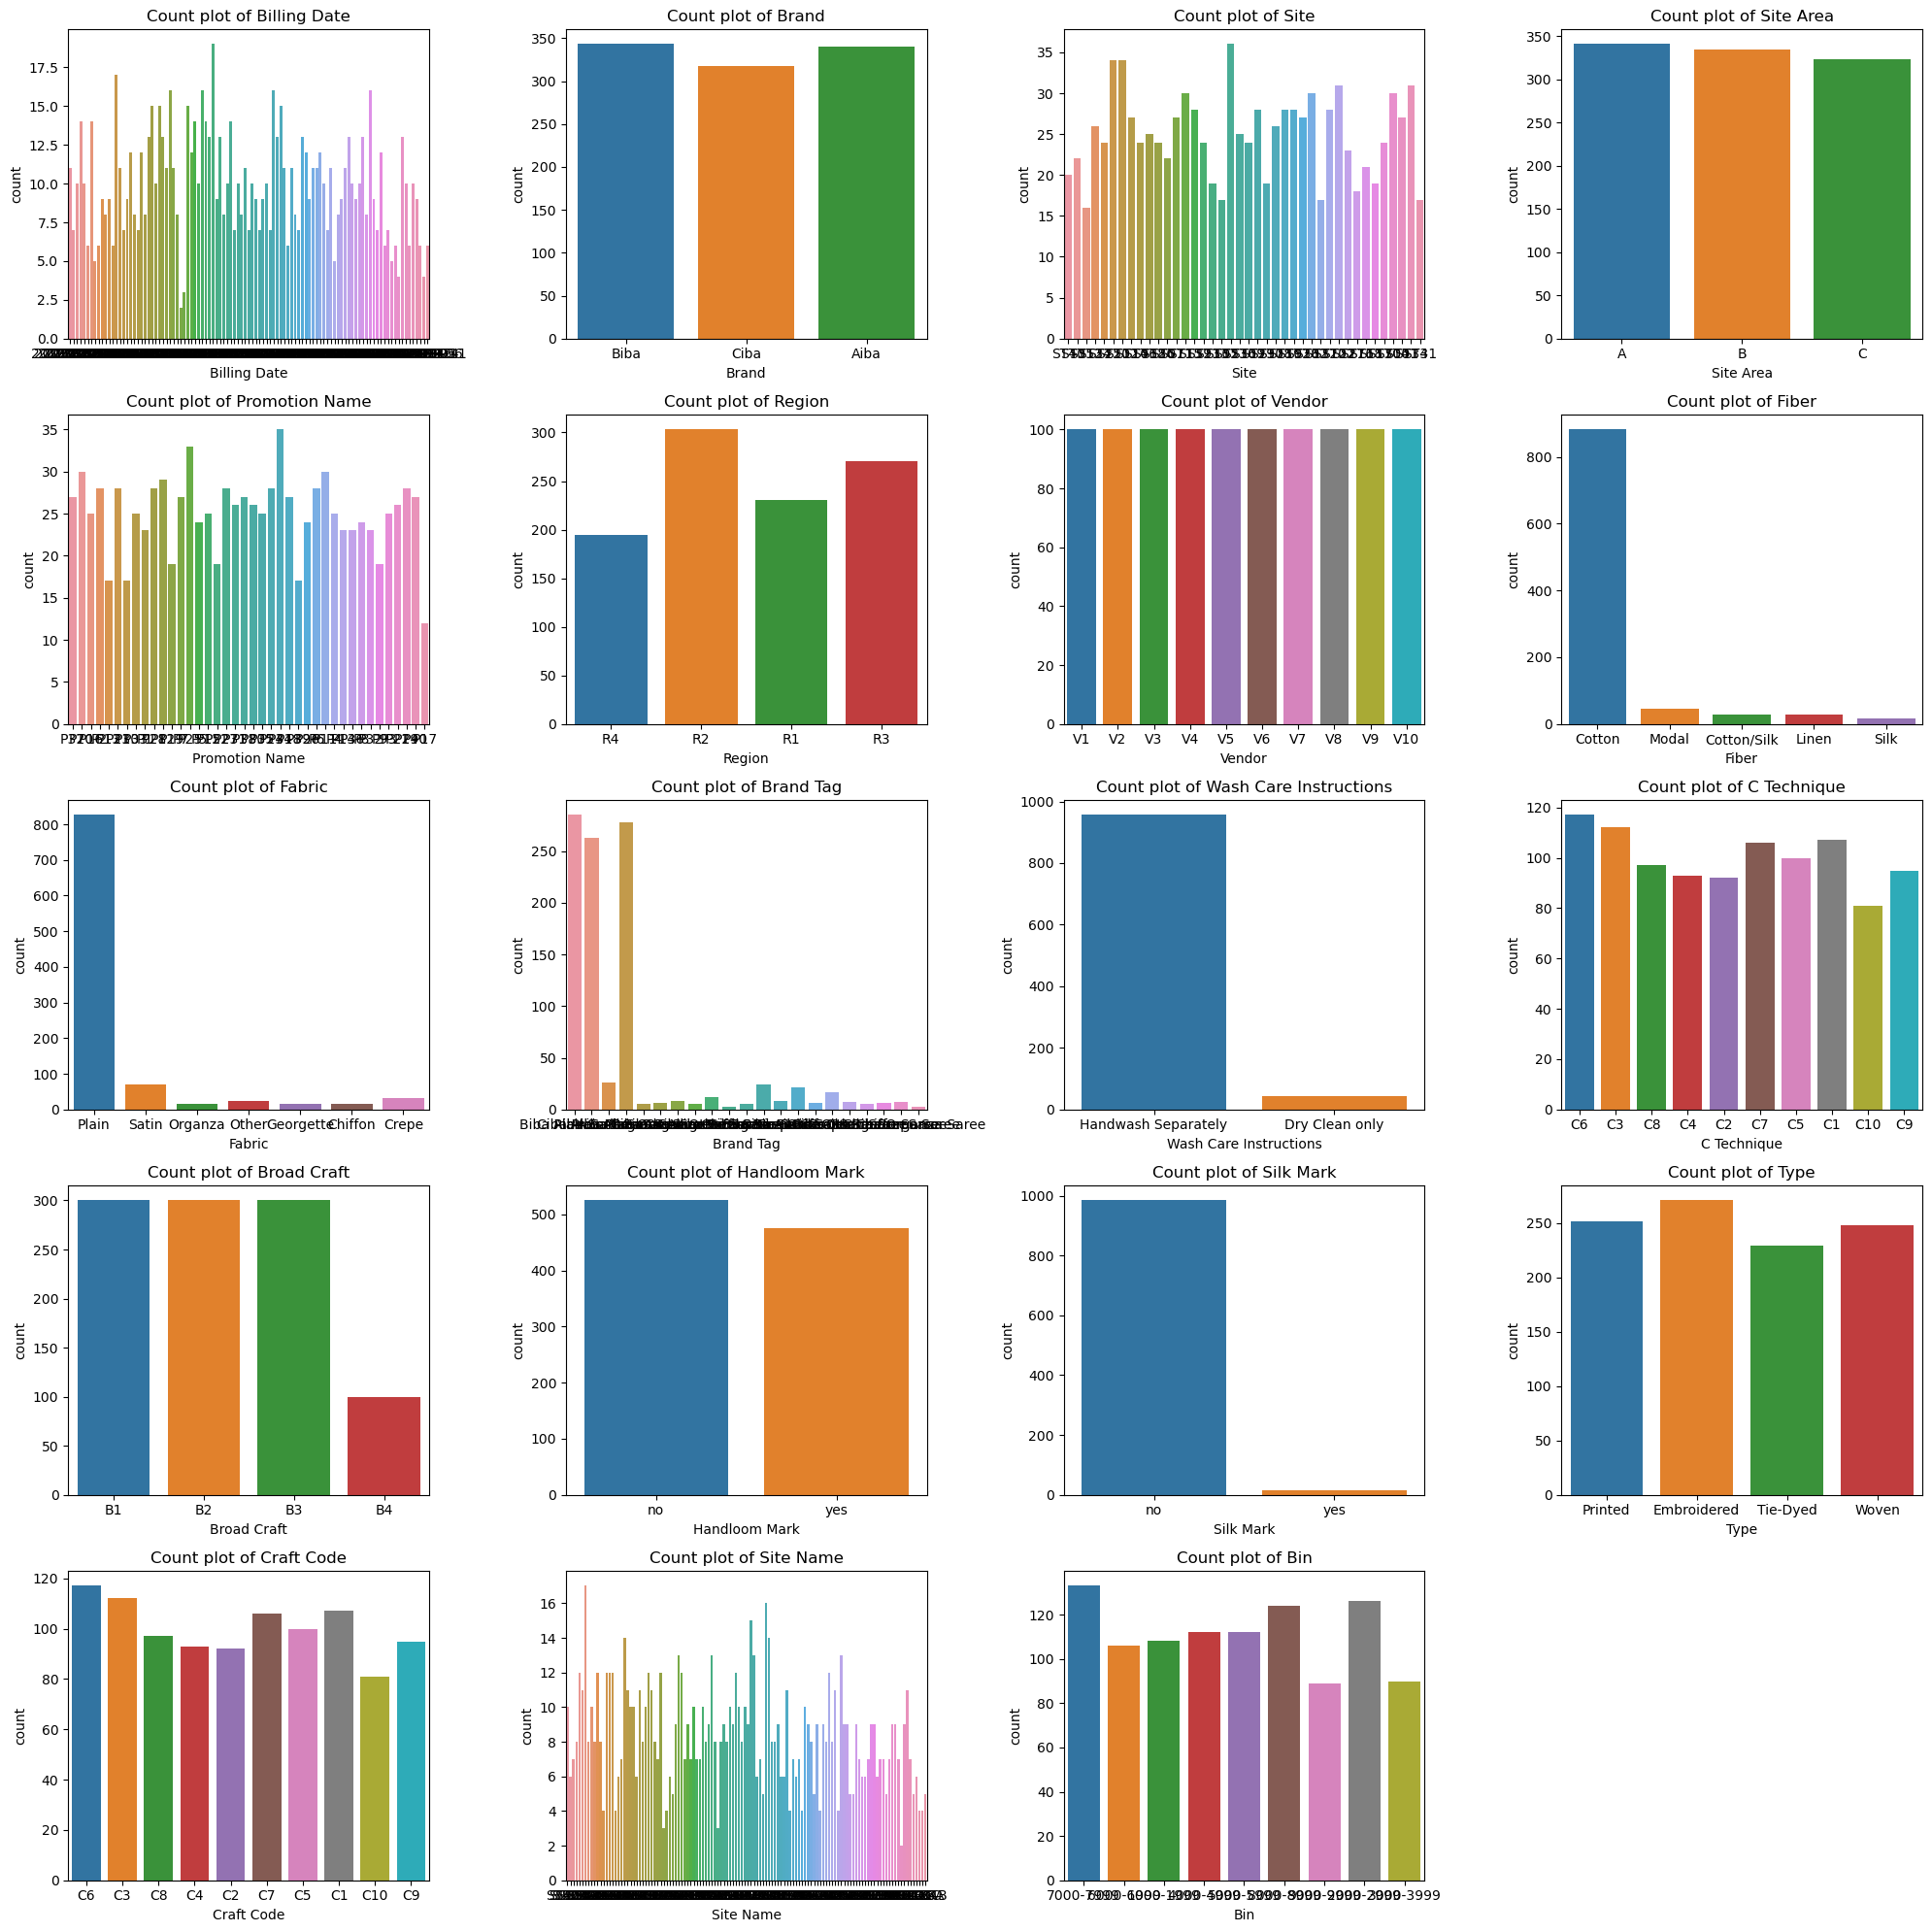

In [42]:
# Determine the number of rows and columns for the subplot grid
non_numeric_columns = len(df.select_dtypes(exclude=['number']).columns)
num_rows_non_numeric = -(-non_numeric_columns // 4)  # Ceiling division
num_cols_non_numeric = min(non_numeric_columns, 4)  # At most 4 columns

fig, axes = plt.subplots(nrows=num_rows_non_numeric, ncols=num_cols_non_numeric, figsize=(5*num_cols_non_numeric, 4*num_rows_non_numeric))

# Flatten the axes array for easy iteration
axes = axes.ravel() if non_numeric_columns > 1 else [axes]

# Loop through non-numeric columns and plot count plots on each subplot
for ax, column in zip(axes, df.select_dtypes(exclude=['number'])):
    sns.countplot(x=df[column], ax=ax)
    ax.set_title(f'Count plot of {column}')

# Remove any unused subplots (if applicable)
for ax in axes[non_numeric_columns:]:
    ax.remove()

plt.tight_layout()
plt.show()


## Pattern 10: How to change the Excel Date to datetime format

### Suppose you are given a column with dates in excel format. You want to change into datetime format. This is how we proceed
#### The Dtype  of date in  excel format is in object type.Hence I am creating an object type by enclosing with ''. 

In [43]:
import pandas as pd
date=['44704', '44820','44816','44989','45140']
df= pd.DataFrame(data=date,columns=['date'])
df

,date
0,44704
1,44820
2,44816
3,44989
4,45140


In [44]:
df['date'].dtypes

dtype('O')

### First we convert into numeric, coercing any errors

In [45]:
df['date'] = pd.to_numeric(df['date'],errors='coerce')
df['date'].dtypes

dtype('int64')

### Now we change to dattime format

In [46]:
df['date']=pd.to_datetime(df['date'],origin='1899-12-30',unit='D')
df['date']

0   2022-05-23
1   2022-09-16
2   2022-09-12
3   2023-03-04
4   2023-08-02
Name: date, dtype: datetime64[ns]

## Pattern 10: How to Get the datatype of every value in a column

### We sometimes need to evaluate the external excel sheets. To check if there is any value or datatype inadvertently put , we can use this command

In [47]:
import random
# Generate a column with mixed datatype values
mixed_column = [
    random.randint(1, 100),            # Integer
    random.uniform(1, 100),            # Float
    random.choice(['A', 'B', 'C']),    # String
    random.choice([True, False]),      # Boolean
    [random.randint(1, 5) for _ in range(3)],  # List
    len,                               # Function
    None,                              # NoneType
    complex(random.randint(1, 10), random.randint(1, 10)),  # Complex number
    { 'key': random.randint(1, 5) },   # Dictionary
    (random.randint(1, 5), random.choice(['A', 'B', 'C']))  # Tuple
]

# Create DataFrame
df_mixed_column = pd.DataFrame({'Mixed Column': mixed_column})
df_mixed_column


,Mixed Column
0,13
1,40.857646
2,B
3,False
4,"[3, 4, 2]"
5,<built-in function len>
6,None
7,(10+2j)
8,{'key': 3}
9,"(4, A)"


In [48]:
df_mixed_column['Mixed Column'].apply(type)

0                           <class 'int'>
1                         <class 'float'>
2                           <class 'str'>
3                          <class 'bool'>
4                          <class 'list'>
5    <class 'builtin_function_or_method'>
6                      <class 'NoneType'>
7                       <class 'complex'>
8                          <class 'dict'>
9                         <class 'tuple'>
Name: Mixed Column, dtype: object

In [49]:
df_mixed_column['Mixed Column'].apply(type).value_counts()

<class 'int'>                           1
<class 'float'>                         1
<class 'str'>                           1
<class 'bool'>                          1
<class 'list'>                          1
<class 'builtin_function_or_method'>    1
<class 'NoneType'>                      1
<class 'complex'>                       1
<class 'dict'>                          1
<class 'tuple'>                         1
Name: Mixed Column, dtype: int64

## Pattern 11: How to Check an Excel sheet for Duplicate Rows, Missing Values, Consistent Datatype in a column 
We sometimes need to evaluate the external excel sheets.We would like to give it a score

In [50]:
import pandas as pd
# Creating a sample dataframe with inconsistencies
sample_data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Alice', None, 'Frank', 'Grace', 'Hannah'],
    'Age': [25, 30, 35, None, 50, 25, 45, 'forty', 55, 60],
    'Email': ['alice@email.com', 'bob@email.com', 'charlie@email.com', None, 'eve@email.com', 
              'alice@email.com', 'daniel@email.com', 'frank@email.com', 'grace@email.com', 'hannah@email.com'],
    'Salary': [50000, 55000, 60000, 65000, 70000, 50000, 75000, 80000, 85000, 90000]
}
df_inconsistent = pd.DataFrame(sample_data)
df_inconsistent

,Name,Age,Email,Salary
0,Alice,25,alice@email.com,50000
1,Bob,30,bob@email.com,55000
2,Charlie,35,charlie@email.com,60000
3,David,None,None,65000
4,Eve,50,eve@email.com,70000
5,Alice,25,alice@email.com,50000
6,None,45,daniel@email.com,75000
7,Frank,forty,frank@email.com,80000
8,Grace,55,grace@email.com,85000
9,Hannah,60,hannah@email.com,90000


In [52]:
import pandas as pd

def calculate_quality_score(df):


    # 1. Missing Values Score
    total_cells = df.size
    missing_values = df.isnull().sum().sum()
    print('missing_values:',missing_values)
    missing_values_score = 40 * (1 - (missing_values / total_cells))
    print('missing_values_score:',missing_values_score)

    # 2. Datatype Integrity Score
    # Check columns with more than one datatype
    inconsistent_columns = 0
    for col in df.columns:
        # Get unique datatypes in the column (excluding missing values)
        unique_datatypes = df[col].dropna().apply(type).unique()
        
        if len(unique_datatypes) > 1:
            print('datatype_integrity_problem_column:',col)
            inconsistent_columns += 1
            
    # Calculate score
    print('Number of inconsistent Columns:',inconsistent_columns)
    datatype_integrity_score = 40 * (1 - inconsistent_columns / df.shape[1])
    print('Datatype_integrity_score:',datatype_integrity_score)

    # 3. Duplication Score
    total_rows = len(df)
    duplicated_rows = df.duplicated().sum()
    print('duplicated_rows:',duplicated_rows)
    duplication_score = 20 * (1 - (duplicated_rows / total_rows))
    print('duplicated_score:',duplication_score)
    
    def check_inconsistencies(series):
        """
        Check for inconsistencies in a pandas Series.

        Parameters:
        - series: Pandas Series

        Returns:
        - dict: A dictionary with keys 'case_inconsistencies' and 'whitespace_inconsistencies'.
                Each key will have a list of values that are inconsistent.
        """



        # Total score
        total_score = missing_values_score + datatype_integrity_score + duplication_score

        return round(total_score, 2)

# As we don't have a sample Excel file, we can't test this function right now.
# However, this is how you'd call the function:
score = calculate_quality_score(df_inconsistent)
print(score)


missing_values: 3
missing_values_score: 37.0
datatype_integrity_problem_column: Age
Number of inconsistent Columns: 1
Datatype_integrity_score: 30.0
duplicated_rows: 1
duplicated_score: 18.0
None


## Pattern 12: How to find the Header row in an excel sheet
This will find the top 3 contenders in the order of their scores and publishes

In [53]:
def find_top_header_rows(file_path, top_n_rows=10):
    """
    Find the top 3 contenders for header rows based on scoring criteria.
    
    Parameters:
    - file_path: Path to the Excel file.
    - top_n_rows: Number of top rows to consider when searching for the header.
    
    Returns:
    - list: A list of tuples containing the top 3 row indices and their scores.
    """
    
    # Read the top n rows of the Excel sheet
    df = pd.read_excel(file_path, header=None, nrows=top_n_rows)
    
    # Initialize a list to store scores for each row
    scores = []
    
    # Score each row
    for index, row in df.iterrows():
        # Score based on number of non-empty cells
        score = row.notnull().sum()
        
        # If the entire row is empty, give it a low score
        if score == 0:
            scores.append((index, 0))
            continue
        
        # Score based on data type consistency with the row below (if exists)
        if index < df.shape[0] - 1:
            next_row = df.iloc[index + 1]
            type_consistency = sum([(isinstance(cell, str) and isinstance(next_cell, (int, float))) or 
                                    (isinstance(cell, (int, float)) and isinstance(next_cell, (int, float))) 
                                    for cell, next_cell in zip(row, next_row)])
            score += type_consistency
        
        scores.append((index, score))
    
    # Sort scores in descending order and return the top 3
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return sorted_scores[:3]

# Without a sample Excel file, we can't test this function right now.
# However, this is how you'd call the function to get the top 3 contenders:
# top_header_rows = find_top_header_rows("path_to_your_excel_file.xlsx")
# print(top_header_rows)


## Pattern 13: How to Check for Case inconsistencies in a Text column
This will find the top 3 contenders in the order of their scores and publishes

In [54]:
def check_inconsistencies(series):
    """
    Check for inconsistencies in a pandas Series.
    
    Parameters:
    - series: Pandas Series
    
    Returns:
    - dict: A dictionary with keys 'case_inconsistencies' and 'whitespace_inconsistencies'.
            Each key will have a list of values that are inconsistent.
    """
    # Check for case inconsistencies
    lower_values = series.str.lower()
    duplicates_after_lowering = lower_values[lower_values.duplicated(keep=False)].sort_values().unique()
    original_values = series[series.str.lower().isin(duplicates_after_lowering)].sort_values().unique()
    case_inconsistencies = [value for value in original_values if value not in duplicates_after_lowering]

    # Check for whitespace inconsistencies
    stripped_values = series.str.strip()
    whitespace_inconsistencies = series[series != stripped_values].unique().tolist()

    return {
        'case_inconsistencies': case_inconsistencies,
        'whitespace_inconsistencies': whitespace_inconsistencies
    }

# For testing purposes, let's create a sample dataframe
sample_data = {
    'Fruits': ['apple', 'Apple', 'APPLE', 'banana ', ' banana', 'cherry', 'cherry  ', ' GRAPE', 'Grape']
}
df_sample = pd.DataFrame(sample_data)

# Check for inconsistencies in the 'Fruits' column
inconsistencies_in_sample = check_inconsistencies(df_sample['Fruits'])
inconsistencies_in_sample


{'case_inconsistencies': ['APPLE', 'Apple'],
 'whitespace_inconsistencies': ['banana ', ' banana', 'cherry  ', ' GRAPE']}

## Pattern 14: How to Analyze a Datetime column for Missing Dates, Valid Datetime column and Frequency of Dates

In [55]:
def analyze_date_column(df, column_name):
    """
    Analyze a potential date column in a pandas DataFrame.
    
    Parameters:
    - df: DataFrame
    - column_name: Name of the column to analyze
    
    Returns:
    - dict: A dictionary with analysis results.
    """
    
    # Initialize results dictionary
    results = {}
    
    # Check if column exists in the dataframe
    if column_name not in df.columns:
        results['error'] = f"Column '{column_name}' not found in the dataframe."
        return results
    
    # Try to convert the column to datetime format
    try:
        df[column_name] = pd.to_datetime(df[column_name])
    except:
        results['is_datetime'] = False
        return results
    
    results['is_datetime'] = True
    
    # Calculate frequency
    sorted_dates = df[column_name].dropna().sort_values()
    date_diffs = sorted_dates.diff().value_counts()
    if not date_diffs.empty:
        results['most_common_frequency'] = date_diffs.idxmax().days
    
    # Calculate range
    results['earliest_date'] = sorted_dates.min()
    results['latest_date'] = sorted_dates.max()
    
    # Check for missing dates
    complete_date_range = pd.date_range(start=sorted_dates.min(), end=sorted_dates.max())
    missing_dates = complete_date_range.difference(sorted_dates)
    results['missing_dates_count'] = len(missing_dates)
    
    # Check for duplicate dates
    duplicate_dates = df[column_name].duplicated(keep=False).sum()
    results['duplicate_dates_count'] = duplicate_dates
    
    return results

# For demonstration, let's create a sample dataframe with some date data
sample_date_data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-05', '2023-01-06', '2023-01-06', '2023-01-08', '2023-01-09']
}
df_sample_date = pd.DataFrame(sample_date_data)

# Analyzing the 'Date' column in the sample dataframe
date_analysis = analyze_date_column(df_sample_date, 'Date')
date_analysis


{'is_datetime': True,
 'most_common_frequency': 1,
 'earliest_date': Timestamp('2023-01-01 00:00:00'),
 'latest_date': Timestamp('2023-01-09 00:00:00'),
 'missing_dates_count': 2,
 'duplicate_dates_count': 2}

## Pattern 15: How to Analyze a Categorical column for Missing values, Value Counts, most common category, least common category and percentage distribution

In [56]:
def analyze_categorical_column(df, column_name):
    """
    Analyze a potential categorical column in a pandas DataFrame.
    
    Parameters:
    - df: DataFrame
    - column_name: Name of the column to analyze
    
    Returns:
    - dict: A dictionary with analysis results.
    """
    
    # Initialize results dictionary
    results = {}
    
    # Check if column exists in the dataframe
    if column_name not in df.columns:
        results['error'] = f"Column '{column_name}' not found in the dataframe."
        return results
    
    column_data = df[column_name]
    
    # Check for missing values
    results['missing_values'] = column_data.isnull().sum()
    
    # Get value counts
    value_counts = column_data.value_counts()
    results['value_counts'] = value_counts.to_dict()
    
    # Most common and least common categories
    results['most_common_category'] = value_counts.idxmax()
    results['least_common_category'] = value_counts.idxmin()
    
    # Percentage distribution
    total_entries = len(column_data)
    results['percentage_distribution'] = (value_counts / total_entries * 100).to_dict()
    
    return results

# For demonstration, let's analyze the 'Color' column in the previously created df_sample
sample_analysis = analyze_categorical_column(df_sample, 'Color')
sample_analysis


# Creating a sample dataframe with a categorical column
sample_data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Blue', 'Red', 'Red', 'Green', None, 'Blue', 'Yellow'],
    'Value': [10, 20, 15, 12, 22, 18, 19, 11, 14, 17, 23, 24, 25]
}
df_sample = pd.DataFrame(sample_data)

# Analyzing the 'Color' column in the sample dataframe
color_analysis = analyze_categorical_column(df_sample, 'Color')
color_analysis


{'missing_values': 1,
 'value_counts': {'Red': 4, 'Blue': 4, 'Green': 3, 'Yellow': 1},
 'most_common_category': 'Red',
 'least_common_category': 'Yellow',
 'percentage_distribution': {'Red': 30.76923076923077,
  'Blue': 30.76923076923077,
  'Green': 23.076923076923077,
  'Yellow': 7.6923076923076925}}

## Pattern 16: How to Analyze a Numeric Column

In [57]:
def analyze_numeric_column(df, column_name):
    """
    Analyze a potential numeric column in a pandas DataFrame.
    
    Parameters:
    - df: DataFrame
    - column_name: Name of the column to analyze
    
    Returns:
    - dict: A dictionary with analysis results.
    """
    
    # Initialize results dictionary
    results = {}
    
    # Check if column exists in the dataframe
    if column_name not in df.columns:
        results['error'] = f"Column '{column_name}' not found in the dataframe."
        return results
    
    column_data = df[column_name]
    
    # Check if the column is numeric
    if not pd.api.types.is_numeric_dtype(column_data):
        results['is_numeric'] = False
        return results
    
    results['is_numeric'] = True
    
    # Basic statistics
    results['mean'] = column_data.mean()
    results['median'] = column_data.median()
    results['std_dev'] = column_data.std()
    results['min_value'] = column_data.min()
    results['max_value'] = column_data.max()
    
    # Check for missing values
    results['missing_values'] = column_data.isnull().sum()
    
    # Check for zero values
    results['zero_values'] = (column_data == 0).sum()
    
    # Distribution properties
    results['skewness'] = column_data.skew()
    results['kurtosis'] = column_data.kurt()
    
    # Unique values
    results['unique_values_count'] = column_data.nunique()
    
    # Potential outliers using IQR
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers_count = ((column_data < (Q1 - 1.5 * IQR)) | (column_data > (Q3 + 1.5 * IQR))).sum()
    results['outliers_count'] = outliers_count
    
    return results

# For demonstration, let's create a sample dataframe with some numeric data
sample_numeric_data = {
    'Value': [10, 20, 15, 12, 22, 18, 19, 11, 14, 17, 23, 24, 25, 0, 1000]
}
df_sample_numeric = pd.DataFrame(sample_numeric_data)

# Analyzing the 'Value' column in the sample dataframe
numeric_analysis = analyze_numeric_column(df_sample_numeric, 'Value')
numeric_analysis
# Skewness 0 : Symmetric,>0 right skewed, <0 left skewed
# Kurtosis >3: potential outliers, <3: Symmetric

{'is_numeric': True,
 'mean': 82.0,
 'median': 18.0,
 'std_dev': 254.04077288048524,
 'min_value': 0,
 'max_value': 1000,
 'missing_values': 0,
 'zero_values': 1,
 'skewness': 3.86854966596105,
 'kurtosis': 14.975700729205435,
 'unique_values_count': 15,
 'outliers_count': 1}

## Pattern 17: to Generate a series of values which contain two digits, two lowercase and one uppercase letter

You  can generalize this pattern to include any sequence

In [64]:
# Initialize required libraries
import numpy as np
import random

# Character sets
digits = '0123456789'
lowercase = 'abcdefghijklmnopqrstuvwxyz'
uppercase = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Corrected function to generate the pattern
def gen_pattern():
    return ''.join([
        ''.join(random.choice(digits) for _ in range(2)),
        ''.join(random.choice(lowercase) for _ in range(2)),
        random.choice(uppercase)
    ])

# Generate a list of 100 strings based on the pattern
pattern_strings = [gen_pattern() for _ in range(100)]
np_pattern_array = np.array(pattern_strings)
np_pattern_array[:10]  # Displaying the first 10 strings as a sample


array(['19lsU', '12ysI', '18tkD', '25ofK', '01pfB', '90vrH', '21lgB',
       '97gtM', '30inQ', '07qjQ'], dtype='<U5')

## Pattern 18: How Split-Apply-Combine in Groupby Works

First: Lets take a simple example of sales data. With three columns stores, product and sales. The goal is to find out total sales of each store

In [65]:
import pandas as pd

# Data
data = {
    'Store': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Product': ['X', 'X', 'Y', 'Y', 'Z', 'Z'],
    'Sales': [10, 15, 20, 25, 30, 35]
}
df = pd.DataFrame(data)

# Split
store_A = df[df['Store'] == 'A']
store_B = df[df['Store'] == 'B']

# Apply
sales_A = store_A['Sales'].sum()
sales_B = store_B['Sales'].sum()

# Combine
result = pd.DataFrame({
    'Store': ['A', 'B'],
    'Total Sales': [sales_A, sales_B]
})

result


,Store,Total Sales
0,A,60
1,B,75


Lets Make it complex where we will generalize it and we want to group by more than one criteria

In [84]:
# Unique combinations of Store and Product
combinations = df.drop_duplicates(subset=['Store', 'Product'])[['Store', 'Product']].reset_index(drop=True)

# Lists to store results
stores = []
products = []
sales_totals = []

# Split and Apply
for _, row in combinations.iterrows():
    store = row['Store']
    product = row['Product']
    
    # Split data by current combination
    subset_df = df[(df['Store'] == store) & (df['Product'] == product)]
    
    # Apply: compute total sales for the combination
    total_sales = subset_df['Sales'].sum()
    
    # Store results
    stores.append(store)
    products.append(product)
    sales_totals.append(total_sales)

# Combine
result_combinations = pd.DataFrame({
    'Store': stores,
    'Product': products,
    'Total Sales': sales_totals
})

result_combinations


,Store,Product,Total Sales
0,A,X,10
1,B,X,15
2,A,Y,20
3,B,Y,25
4,A,Z,30
5,B,Z,35


The same can be achieved using groupby as follows:

In [85]:
df.groupby(['Store', 'Product'])['Sales'].sum().reset_index()

,Store,Product,Sales
0,A,X,10
1,A,Y,20
2,A,Z,30
3,B,X,15
4,B,Y,25
5,B,Z,35


### A Very important Groupby 

In [110]:
df.groupby(['Store']).agg({'Product':lambda x:list(x),'Sales':'sum'})

,Product,Sales
Store,,
A,"[X, Y, Z]",60
B,"[X, Y, Z]",75


### Pattern 18. I have a dataframe with some columns in it say they are 'a','b','c' and so on... I want to create a function called filter, which takes one of the values in the columns as the argument, provided by the user and filters the df. I would like to make it scalable, columns can be one or more, values can be one or more

In [1]:
import pandas as pd

def filter_dataframe(df, filter_dict):
    """
    Filters the DataFrame based on the provided filter_dict.
    
    Parameters:
    - df: pandas.DataFrame to be filtered.
    - filter_dict: A dictionary where keys are column names and values are lists of values to filter by.
    
    Returns:
    - A filtered DataFrame.
    """
    # Starting with the entire DataFrame
    filtered_df = df
    
    # Iterating over each item in the filter dictionary
    for column, values in filter_dict.items():
        # Checking if the column exists in the DataFrame
        if column in df.columns:
            # Filtering the DataFrame for the values in the current column
            filtered_df = filtered_df[filtered_df[column].isin(values)]
        else:
            print(f"Column '{column}' not found in DataFrame.")
    
    return filtered_df


In [5]:
# Example DataFrame
data = {'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8], 'c': [9, 10, 11, 12]}
df = pd.DataFrame(data)
df

,a,b,c
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


In [6]:
# Example filter: filtering where 'a' is 1 or 2, and 'b' is 5
filter_dict = {'a': [1,2], 'b': [5,6]}

# Using the filter function
filtered_df = filter_dataframe(df, filter_dict)
print(filtered_df)

   a  b   c
0  1  5   9
1  2  6  10
